# Car Evaluation Prediction
- MultiClass Classification

----------------------------------------------------------------------------------------------------------------------------------------------

# Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [2]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Renaming the Column Names

In [3]:
df.columns = ['buying price','maintainence price','numbers of doors','number of persons','lug boot','safety','car acceptability']

In [4]:
df

,buying price,maintainence price,numbers of doors,number of persons,lug boot,safety,car acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


# Obesrvation
- All the features are in Object Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   buying price        1727 non-null   object
 1   maintainence price  1727 non-null   object
 2   numbers of doors    1727 non-null   object
 3   number of persons   1727 non-null   object
 4   lug boot            1727 non-null   object
 5   safety              1727 non-null   object
 6   car acceptability   1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Observation
- No null values

In [6]:
df.isnull().sum()

buying price          0
maintainence price    0
numbers of doors      0
number of persons     0
lug boot              0
safety                0
car acceptability     0
dtype: int64

# Checking Values for each Columns

In [7]:
df['buying price'].value_counts()

buying price
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

In [8]:
df['maintainence price'].value_counts()

maintainence price
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

In [9]:
df['numbers of doors'].value_counts()

numbers of doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64

In [10]:
df['number of persons'].value_counts()

number of persons
4       576
more    576
2       575
Name: count, dtype: int64

In [11]:
df['lug boot'].value_counts()

lug boot
med      576
big      576
small    575
Name: count, dtype: int64

In [12]:
df['safety'].value_counts()

safety
med     576
high    576
low     575
Name: count, dtype: int64

In [13]:
df['car acceptability'].value_counts()

car acceptability
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

# Observation
- In 2 feautres we required cleaning
1. Number of Persons
2. Number of Doors

------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Cleaning

In [14]:
df['numbers of doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [15]:
df['numbers of doors'].value_counts()

numbers of doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64

In [16]:
df['numbers of doors'] = df['numbers of doors'].str.replace('5more','5')

In [17]:
df['numbers of doors'].value_counts()

numbers of doors
3    432
4    432
5    432
2    431
Name: count, dtype: int64

In [18]:
df['number of persons'].value_counts()

number of persons
4       576
more    576
2       575
Name: count, dtype: int64

In [19]:
df['number of persons'] = df['number of persons'].str.replace('more','5')

In [20]:

df['number of persons'].value_counts()

number of persons
4    576
5    576
2    575
Name: count, dtype: int64

# TypeCasting

In [21]:
df['number of persons'] = df['number of persons'].astype('int')
df['numbers of doors'] = df['numbers of doors'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   buying price        1727 non-null   object
 1   maintainence price  1727 non-null   object
 2   numbers of doors    1727 non-null   int64 
 3   number of persons   1727 non-null   int64 
 4   lug boot            1727 non-null   object
 5   safety              1727 non-null   object
 6   car acceptability   1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA

In [22]:
df_eda = df.copy()

In [23]:
df_eda

,buying price,maintainence price,numbers of doors,number of persons,lug boot,safety,car acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5,5,med,med,good
1723,low,low,5,5,med,high,vgood
1724,low,low,5,5,big,low,unacc
1725,low,low,5,5,big,med,good


In [24]:
from sklearn.preprocessing import LabelEncoder

Object_cols = [features for features in df_eda.columns if df_eda[features].dtype =='O']
for cols in Object_cols:
    encoder = LabelEncoder()
    df_eda[cols] = encoder.fit_transform(df_eda[cols].astype(str))
    
df_eda.head()

,buying price,maintainence price,numbers of doors,number of persons,lug boot,safety,car acceptability
0,3,3,2,2,2,2,2
1,3,3,2,2,2,0,2
2,3,3,2,2,1,1,2
3,3,3,2,2,1,2,2
4,3,3,2,2,1,0,2


# Correlation

In [25]:
df_eda.corr()

,buying price,maintainence price,numbers of doors,number of persons,lug boot,safety,car acceptability
buying price,1.000000e+00,-1.043357e-03,1.043357e-03,1.039204e-03,-9.523677e-04,-3.200145e-16,0.051058
maintainence price,-1.043357e-03,1.000000e+00,1.043357e-03,1.039204e-03,-9.523677e-04,-1.012963e-16,0.039821
numbers of doors,1.043357e-03,1.043357e-03,1.000000e+00,-1.039204e-03,9.523677e-04,6.929129e-17,-0.030950
number of persons,1.039204e-03,1.039204e-03,-1.039204e-03,1.000000e+00,9.485770e-04,1.578098e-17,-0.332201
lug boot,-9.523677e-04,-9.523677e-04,9.523677e-04,9.485770e-04,1.000000e+00,-7.231156e-18,0.032839
safety,-3.200145e-16,-1.012963e-16,6.929129e-17,1.578098e-17,-7.231156e-18,1.000000e+00,-0.021045
car acceptability,5.105835e-02,3.982107e-02,-3.094953e-02,-3.322006e-01,3.283926e-02,-2.104530e-02,1.000000


# Heatmap

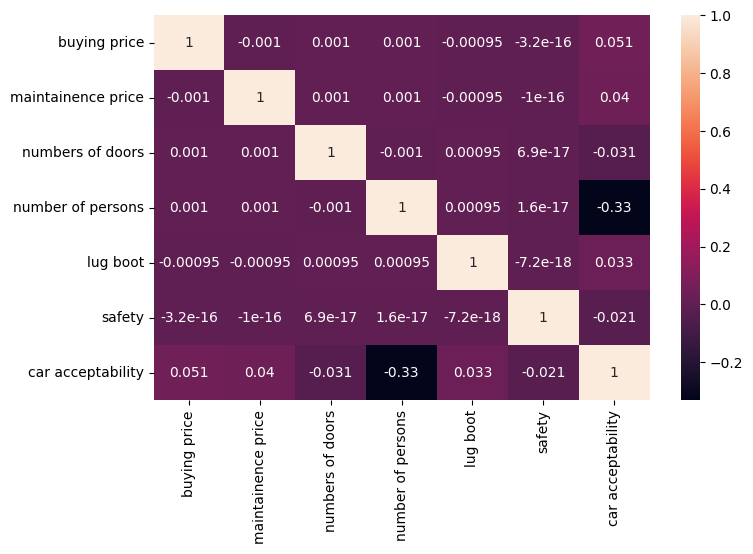

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(df_eda.corr(),annot=True)
plt.show()

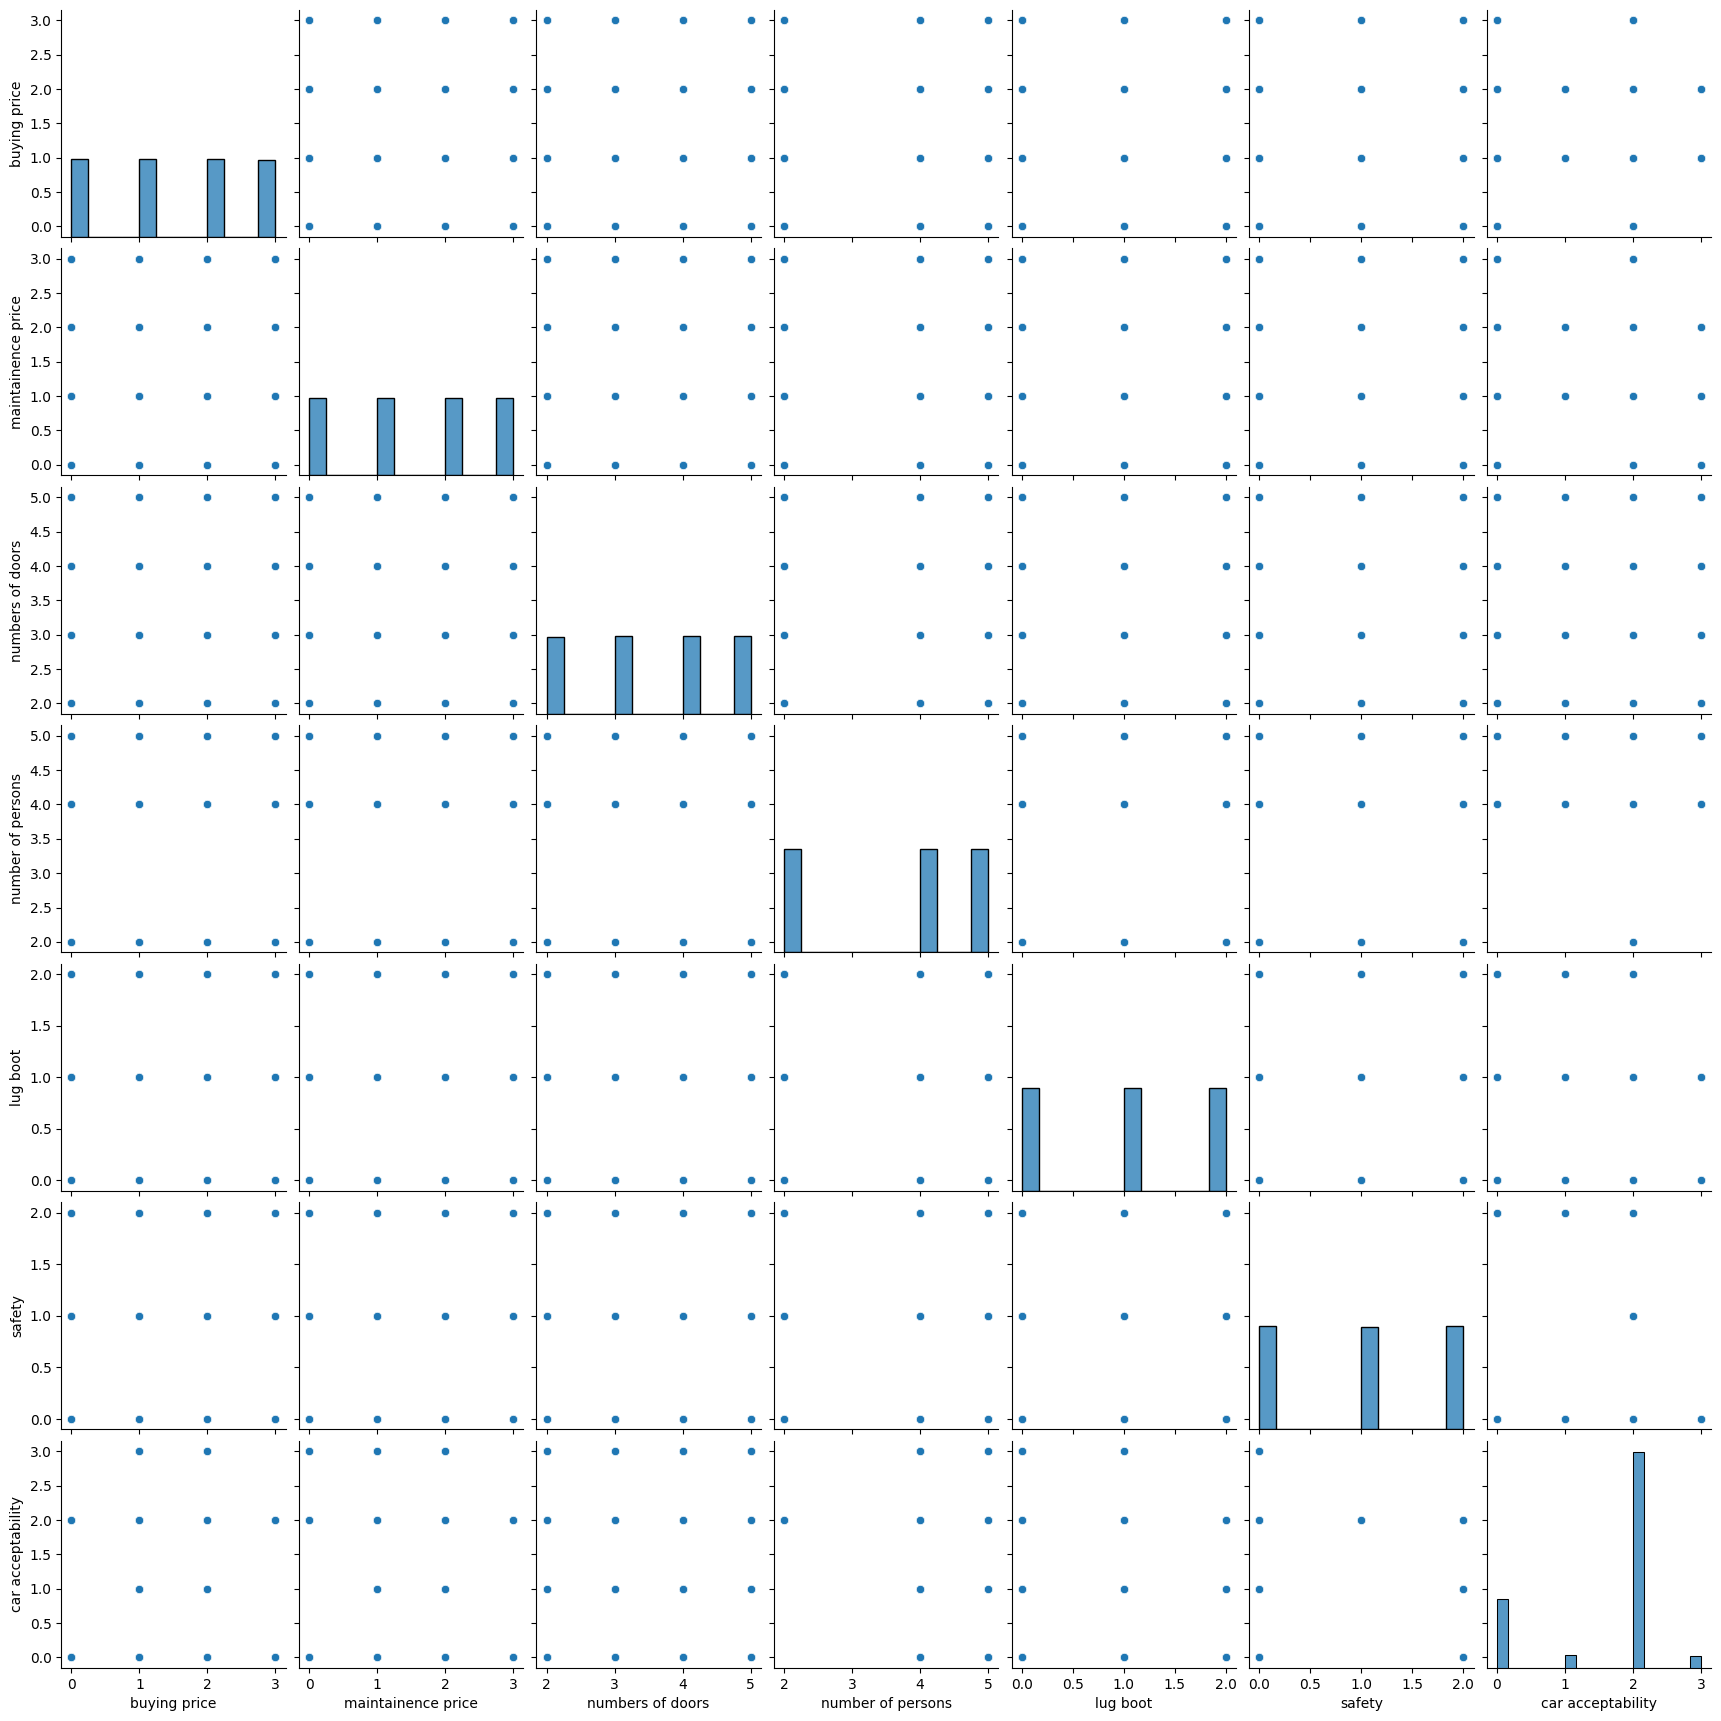

In [27]:
sns.pairplot(df_eda)

# Univariate Analysis For the Features

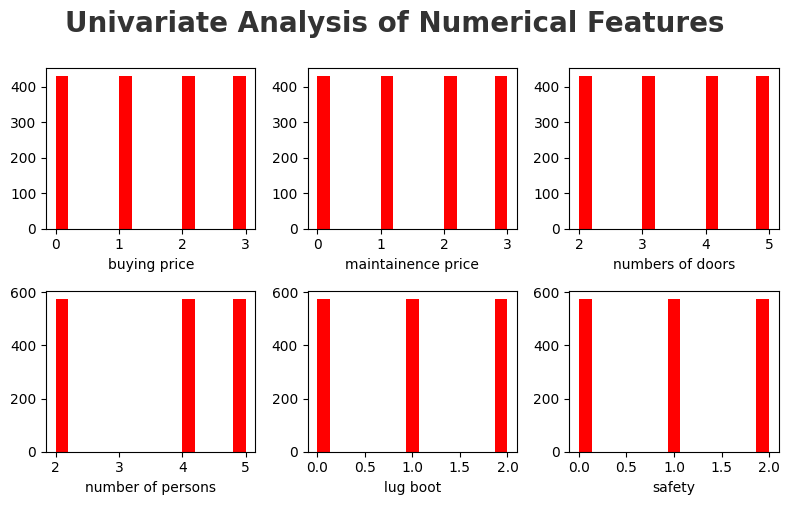

In [28]:
plt.figure(figsize=(8,5))
plt.suptitle('Univariate Analysis of Numerical Features' , fontsize = 20 , fontweight = 'bold' , alpha = 0.8 , y = 1.)
cols = df_eda.columns


for i in range(len(df_eda)):
    if(i<6):
        plt.subplot(2,3,i+1)
        plt.hist(df_eda[cols[i]] , bins = 15,color = 'r')
        plt.xlabel(cols[i])
        plt.tight_layout()

---------------------------------------------------------------------------------------------------------------------------------------------------

In [29]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [30]:
X

,buying price,maintainence price,numbers of doors,number of persons,lug boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5,5,med,med
1723,low,low,5,5,med,high
1724,low,low,5,5,big,low
1725,low,low,5,5,big,med


In [31]:
Y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: car acceptability, Length: 1727, dtype: object

# Splitting The data

In [32]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

# Encoding

In [33]:
Obj = [features for features in X_train.columns if X_train[features].dtypes == 'O']
Obj

['buying price', 'maintainence price', 'lug boot', 'safety']

# Fitting On Training Data

In [34]:
le1 = LabelEncoder()
X_train['buying price'] = le1.fit_transform(X_train['buying price'].astype(str))

le2 = LabelEncoder()
X_train['maintainence price'] = le2.fit_transform(X_train['maintainence price'].astype(str))

le3 = LabelEncoder()
X_train['lug boot'] = le3.fit_transform(X_train['lug boot'].astype(str))

le4 = LabelEncoder()
X_train['safety'] = le4.fit_transform(X_train['safety'].astype(str))

# Fitting On Test data

In [35]:
X_test['buying price'] = le1.transform(X_test['buying price'].astype(str))
X_test['maintainence price'] = le2.transform(X_test['maintainence price'].astype(str))
X_test['lug boot'] = le3.transform(X_test['lug boot'].astype(str))
X_test['safety'] = le4.transform(X_test['safety'].astype(str))

# Encoding the Output Feature

In [36]:
ley = LabelEncoder()
Y_train = ley.fit_transform(Y_train)

In [37]:
Y_test = ley.transform(Y_test)

In [38]:
X_train

,buying price,maintainence price,numbers of doors,number of persons,lug boot,safety
1412,1,0,2,4,2,1
756,0,1,2,2,2,2
589,0,0,3,5,1,0
906,2,3,3,4,0,2
1022,2,0,3,5,0,1
...,...,...,...,...,...,...
1130,2,2,3,5,0,1
1294,2,1,5,5,0,0
860,0,1,5,5,0,1
1459,1,0,4,2,2,0


In [39]:
Y_train

array([2, 2, 0, ..., 2, 2, 0], shape=(1295,))

# Standardizing

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [41]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,Y_train)
Y_pred_test = svc.predict(X_test)
Y_pred_test

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 2, 3, 0, 0, 2, 3, 0, 2, 3, 2, 0, 0,
       3, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 0,
       2, 0, 3, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0,

# Performance Matrics on test data for SVC

In [42]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
print("The Accuracy is =",accuracy_score(Y_test , Y_pred_test))
print(confusion_matrix(Y_test,Y_pred_test))
print(classification_report(Y_test,Y_pred_test))

The Accuracy is = 0.8935185185185185
[[ 94   0  10   1]
 [ 12   3   0   1]
 [ 16   0 274   0]
 [  6   0   0  15]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       105
           1       1.00      0.19      0.32        16
           2       0.96      0.94      0.95       290
           3       0.88      0.71      0.79        21

    accuracy                           0.89       432
   macro avg       0.90      0.69      0.72       432
weighted avg       0.91      0.89      0.89       432



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Hyperparameter Tuninig

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf','linear','poly']
              }

grid = GridSearchCV(estimator=svc , param_grid=param_grid , cv = 5 , refit=True , n_jobs = -1)
grid.fit(X_train,Y_train)
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

# Performance Matric On test Data

In [44]:
Y_pred_grid_test = grid.predict(X_test)
print(Y_pred_grid_test)
print("The Accuracy is =",accuracy_score(Y_test , Y_pred_grid_test))
print(confusion_matrix(Y_test,Y_pred_grid_test))
print(classification_report(Y_test,Y_pred_grid_test))

[2 2 2 0 2 0 2 2 2 2 3 2 2 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 0 2 2 1 2 2 1
 2 2 3 0 0 2 2 0 0 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 3 2 2 1 2 3 0 2 2
 2 0 2 2 2 2 3 2 2 0 2 0 2 2 0 0 2 1 2 2 2 2 2 2 2 0 2 2 2 2 2 1 0 2 2 0 2
 0 2 2 0 2 2 2 2 2 2 0 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2
 0 2 0 3 2 2 2 2 2 2 2 2 0 0 2 1 2 3 0 0 2 3 0 2 1 2 0 0 3 2 0 2 0 2 2 0 1
 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 3 2 0 2 0 2 1 2 2 0 2 2 2 2 2 2 0 3 2
 2 0 0 0 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2
 2 0 2 0 2 2 2 0 0 2 2 2 2 0 2 0 0 2 1 2 2 2 1 2 0 3 0 2 1 3 2 1 2 2 2 0 3
 2 2 2 2 0 0 2 2 2 2 2 2 0 2 3 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 1 0 2 2 2 2 2
 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 3 2 2 2 0 0 0 2 3 0 2 0
 2 3 2 3 2 2 2 0 2 0 0 2 0 2 2 2 0 2 2 2 2 0 0 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 0 0 0 0 3 0 2 2 2 0 0 0 2 2 2 2 0 2 1 2]
The Accuracy is = 0.9837962962962963
[[104   0   0   1]
 [  2  13   0   1]
 [  0   0 290   0]
 [  1   2   0  18]]
         

# Perfromance Metric On training Data

In [45]:
Y_pred_grid_train = grid.predict(X_train)
print("The Accuracy is =",accuracy_score(Y_train , Y_pred_grid_train))
print(confusion_matrix(Y_train,Y_pred_grid_train))
print(classification_report(Y_train,Y_pred_grid_train))

The Accuracy is = 1.0
[[279   0   0   0]
 [  0  53   0   0]
 [  0   0 919   0]
 [  0   0   0  44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00       919
           3       1.00      1.00      1.00        44

    accuracy                           1.00      1295
   macro avg       1.00      1.00      1.00      1295
weighted avg       1.00      1.00      1.00      1295



# Observation 
- On both Training and test data the accuracy is good no case of overloading or data leaking

# Randomized Search CV

In [49]:
from sklearn.model_selection import RandomizedSearchCV
param = {'C':[100],'gamma':[0.1],'kernel':['rbf']}
rand = RandomizedSearchCV(estimator=svc , param_distributions=param , cv = 5)
rand.fit(X_train , Y_train)

Y_pred_rand_test = rand.predict(X_test)
print(Y_pred_rand_test)
print("The Accuracy is =",accuracy_score(Y_test , Y_pred_rand_test))
print(confusion_matrix(Y_test,Y_pred_rand_test))
print(classification_report(Y_test,Y_pred_rand_test))


[2 2 2 0 2 0 2 2 2 2 3 2 2 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 0 2 2 1 2 2 1
 2 2 3 0 0 2 2 0 0 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 3 2 2 1 2 3 0 2 2
 2 0 2 2 2 2 3 2 2 0 2 0 2 2 0 0 2 1 2 2 2 2 2 2 2 0 2 2 2 2 2 1 0 2 2 0 2
 0 2 2 0 2 2 2 2 2 2 0 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2
 0 2 0 3 2 2 2 2 2 2 2 2 0 0 2 1 2 3 0 0 2 3 0 2 1 2 0 0 3 2 0 2 0 2 2 0 1
 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 3 2 0 2 0 2 1 2 2 0 2 2 2 2 2 2 0 3 2
 2 0 0 0 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2
 2 0 2 0 2 2 2 0 0 2 2 2 2 0 2 0 0 2 1 2 2 2 1 2 0 3 0 2 1 3 2 1 2 2 2 0 3
 2 2 2 2 0 0 2 2 2 2 2 2 0 2 3 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 1 0 2 2 2 2 2
 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 3 2 2 2 0 0 0 2 3 0 2 0
 2 3 2 3 2 2 2 0 2 0 0 2 0 2 2 2 0 2 2 2 2 0 0 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 0 0 0 0 3 0 2 2 2 0 0 0 2 2 2 2 0 2 1 2]
The Accuracy is = 0.9837962962962963
[[104   0   0   1]
 [  2  13   0   1]
 [  0   0 290   0]
 [  1   2   0  18]]
         

# Final Accuracy's
- SVC - 89%
- GridSearchCV - 98.3%
- RandomSearchCV - 98.3%

In [51]:
import pickle

pickle.dump(rand,open("car_eval_model.pkl","wb"))